# Ejercicio: Predicción Univariante de la Temperatura del Agua

**Objetivo:** Desarrollar un modelo que sea capaz de predecir la temperatura del agua de los días futuros en función de la temperatura pasada.

**Instrucciones:**

1. **Preparación de Datos**:
    - Cargar el conjunto de datos desde el archivo proporcionado.
    - Transformar la serie temporal en un problema de aprendizaje supervisado. Para ello, utiliza un "ventana deslizante" donde los valores anteriores de temperatura (por ejemplo, los valores de los últimos 5 días) se utilicen para predecir el valor del siguiente día.

2. **División de Datos**:
    - Divide el conjunto transformado en datos de entrenamiento y prueba, considerando un 20% de los datos para prueba.

3. **Modelo Univariante**:
    - Utiliza la biblioteca `scikit-learn` para crear y entrenar un modelo de regresión, como una regresión lineal.
    - La variable dependiente (y) será el valor de 'temperatura' del siguiente día y las variables independientes (X) serán los valores de 'temperatura' de los días previos.

4. **Evaluación**:
    - Realiza predicciones sobre los datos de prueba.
    - Calcula y muestra métricas de evaluación como el error cuadrático medio (MSE) y el coeficiente de determinación R^2 para evaluar el rendimiento del modelo.

5. **Visualización**:
    - Grafica las predicciones y los valores reales para visualizar el desempeño del modelo sobre los datos de prueba. Representa las predicciones y los valores reales en diferentes colores.

**Pista**:
Para transformar la serie temporal en un conjunto de datos de aprendizaje supervisado, considera definir una función que tome una serie y un tamaño de ventana deslizante como argumentos y devuelva un DataFrame donde cada fila representa una "muestra" y tiene las columnas de los valores pasados y la columna de la temperatura objetivo del siguiente día.
 

### 1. Preparación de Datos
Comenzaremos por cargar los datos y transformar la serie temporal en un problema de aprendizaje supervisado.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar datos
file_path = './laguna_datos_horarios_rellenos.csv'
df = pd.read_csv(file_path)
df = df.sort_values(by='fecha')

# Transformar la serie temporal usando una ventana deslizante
def series_to_supervised(data, window=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(window, 0, -1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True)
    return df

window_size = 5
data_supervised = series_to_supervised(df['temperatura'], window=window_size)
X = data_supervised.iloc[:, :-1]
y = data_supervised.iloc[:, -1]


In [5]:
### 2. División de Datos

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

### 3. Modelo Univariante

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4. Evaluación

In [8]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación R^2: {r2:.2f}")


Error Cuadrático Medio (MSE): 1.68
Coeficiente de Determinación R^2: 0.83


### 5. Visualización

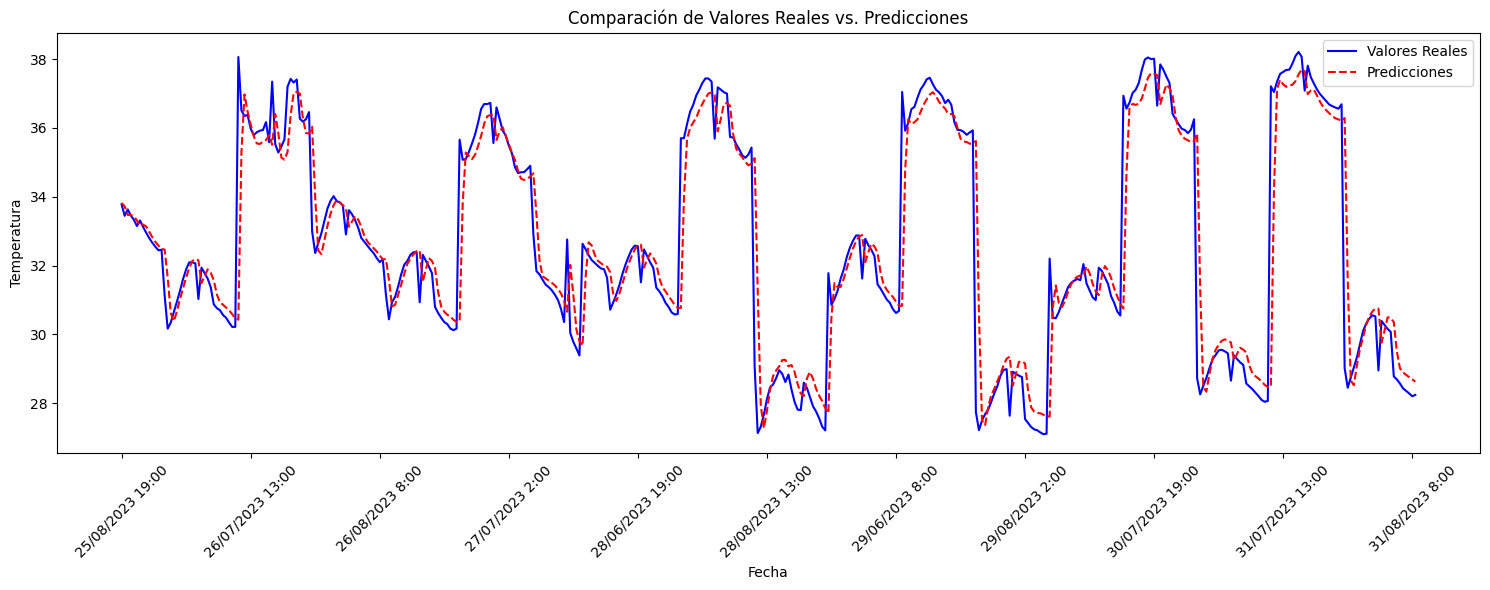

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(df['fecha'][-len(y_test):], y_test, label='Valores Reales', color='blue')
plt.plot(df['fecha'][-len(y_pred):], y_pred, label='Predicciones', color='red', linestyle='dashed')
plt.legend()
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')

# Limitar el número de ticks en el eje X para una mejor visualización
num_ticks = 10
selected_ticks = df['fecha'][-len(y_test):].tolist()[::len(y_test)//num_ticks]
plt.xticks(selected_ticks, rotation=45)

plt.tight_layout()
plt.show()
